In [318]:
#reset all variabls
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [1]:
# cut the cell

import abtem
import ase.io
import matplotlib.pyplot as plt
import numpy as np
from ase.io import read
from ase.build import surface
from abtem.atoms import pretty_print_transform
import py4DSTEM
from py4DSTEM import show
import os

In [2]:
## update py4dstem to see if data storage works better

print(py4DSTEM.__version__)

0.14.14


In [3]:
## set_the_output_folder

run_number = "013"
output_folder = os.path.join("/masc_shared/ag_volz/Oliver_Maßmeyer/MS_Ptycho/", run_number)
#create the folder --> throws error if already existing
os.mkdir(output_folder)


FileExistsError: [Errno 17] File exists: '/masc_shared/ag_volz/Oliver_Maßmeyer/MS_Ptycho/013'

## Building the Moire Cell for Simulations

In [18]:
#load cifs
WS2_cell = ase.io.read("/masc_shared/ag_volz/Py4dSTEM_tutorial-data/WS2.cif")

Text(0.5, 0.98, 'WS2_cell_expanded')

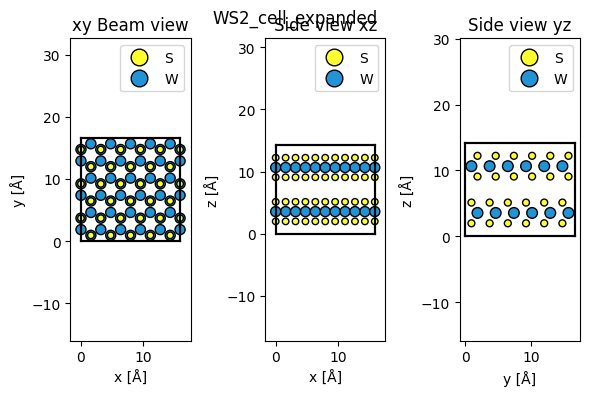

In [19]:
# orthogonalize the cell
WS2_cell, transform = abtem.orthogonalize_cell(
    WS2_cell, max_repetitions=10, return_transform=True
)

# expand cells
WS2_cell_expanded = WS2_cell*(5,3,1)

#plot i 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(WS2_cell_expanded, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(WS2_cell_expanded, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(WS2_cell_expanded, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('WS2_cell_expanded')

In [20]:
# get the lengths of the cell

cell_lengths = WS2_cell_expanded.cell.lengths()
cell_lengths

array([15.95365165, 16.57952113, 14.202402  ])

Text(0.5, 0.98, 'WS2_cell_cut')

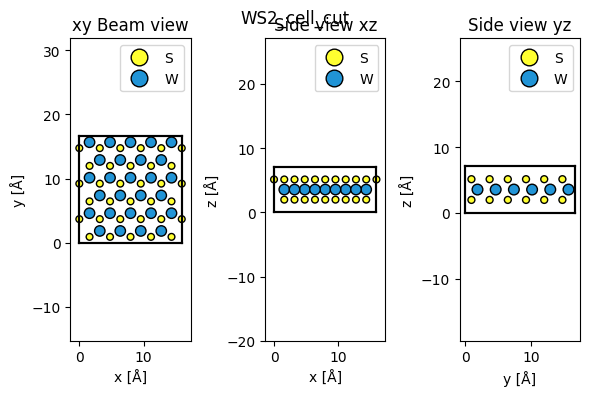

In [23]:
WS2_cell_cut = ase.build.cut(WS2_cell_expanded,(1, 0, 0),(0, 1, 0),(0, 0, 0.5))
# WS2_cell_cut.wrap()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(WS2_cell_cut, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(WS2_cell_cut, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(WS2_cell_cut, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('WS2_cell_cut')

Text(0.5, 0.98, 'WS2_cell_cut_rot')

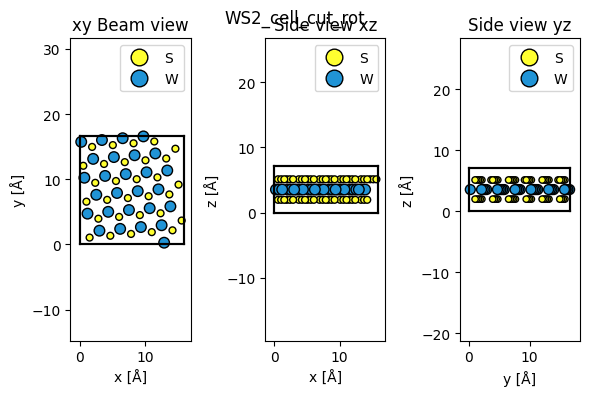

In [22]:
# stack with angle
WS2_cell_cut_rot = WS2_cell_cut
WS2_cell_cut_rot.rotate(5,'z')

# WS2_cell_cut.wrap()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(WS2_cell_cut_rot, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(WS2_cell_cut_rot, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(WS2_cell_cut_rot, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('WS2_cell_cut_rot')

Text(0.5, 0.98, 'moire')

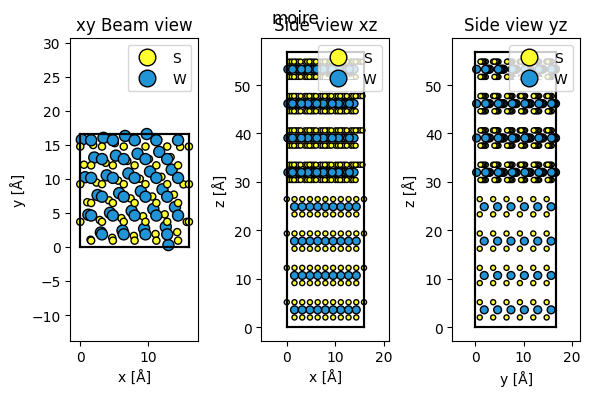

In [24]:
# stack cell
moire = ase.build.stack(WS2_cell_cut*(1,1,4),WS2_cell_cut_rot*(1,1,4), axis = 2, maxstrain=100)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(moire, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(moire, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(moire, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('moire')


Text(0.5, 0.98, 'moire')

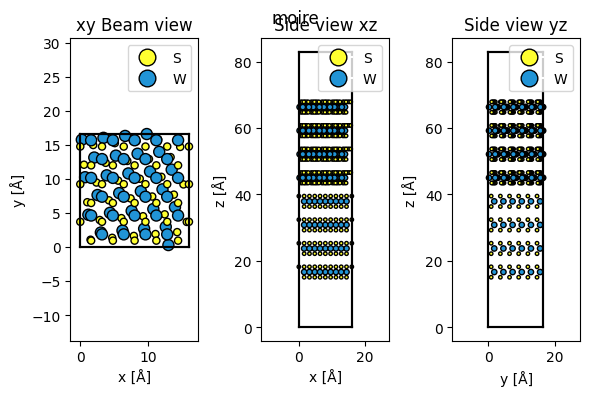

In [25]:
# add vaccum
moire.center(axis=2, vacuum=15)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(moire, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(moire, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(moire, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('moire')

In [26]:
# store the ase cell "/masc_shared/ag_volz/Oliver_Maßmeyer/MS_Ptycho/Ase_Cells/Moire_vac3nm.cif"
ase.io.write(filename=os.path.join(output_folder,"Cell.cif"), 
             images=moire,
    # format: str = None,
    # parallel: bool = True,
    # append: bool = False,
    # **kwargs: dict,
)

## Running the ABTEM Simulaiton

slice_thicknesses in Angström: 3.3141797874494396
Length of the Potential 25
[########################################] | 100% Completed | 101.16 ms


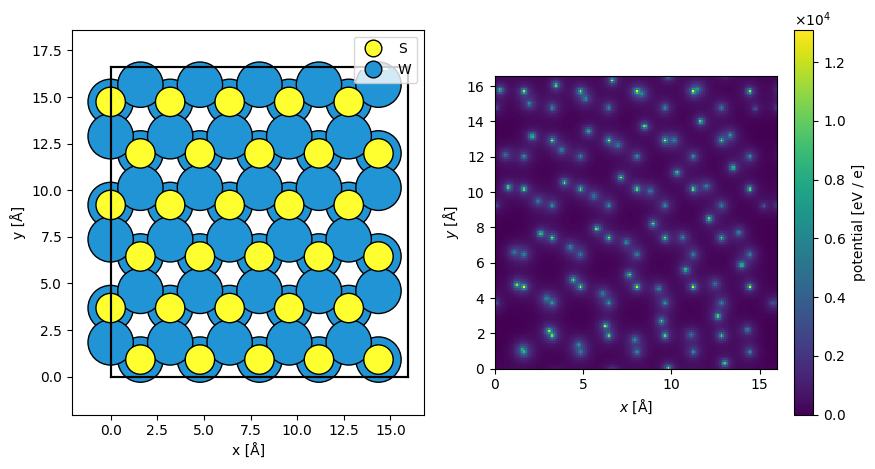

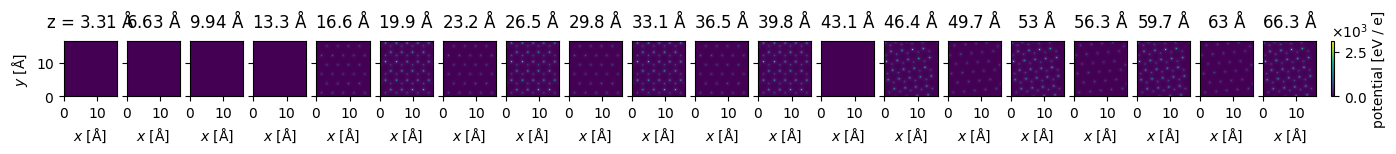

In [33]:
# run the simulation:

#get slice thickness
lengths = moire.cell.lengths()
#calculate slices:
num_slices = 25
slice_thicknesses = lengths[2]/num_slices # cell thickness from simulation
print('slice_thicknesses in Angström:', slice_thicknesses)

#parameters:
energy = 80e3 # volts
semiangle_cutoff = 21 # mrad
defocus = 50 # ang

#Create the Potentials by independent atom model (IAM)
potential = abtem.Potential(
    moire,
    sampling=0.1, # lower sampling to match 4D data
    # parametrization="lobato",
    parametrization="kirkland",
    slice_thickness=slice_thicknesses,
    projection="infinite",
)
print("Length of the Potential",len(potential))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

abtem.show_atoms(WS2_cell_expanded, ax=ax1, legend=True)

visualization = potential.show(ax=ax2,cbar=True);

#visualize slices of the potential
visualization = potential[0:20].show(
    project=False,
    explode=True,
    figsize=(16, 5),
    common_color_scale=True,
    cbar=True,
)

plt.show()

In [34]:
## Building the potential for storage
build_potential = potential.build().compute()
build_potential.array

[########################################] | 100% Completed | 101.78 ms


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [35]:
## save potential array as datacube for py4dstem

## save path
potential_save_path = os.path.join(output_folder,"Abtem_Potential_array.h5")

potential_cube = py4DSTEM.Array(
                    data=build_potential.array,
                    name='Object_Potential',
                    units= "eV/e",
                    dims=None, #list
                    dim_names= ["potential_slices","x","y"], #list
                    dim_units= ["#","A","A"], #list
                    slicelabels=None,
                )
#could add calibration if needed
# datacube.calibration.set_R_pixel_size(scan_step_size)
# datacube.calibration.set_R_pixel_units('A')
# datacube.calibration.set_Q_pixel_size(measurements.angular_sampling[0])
# datacube.calibration.set_Q_pixel_units('mrad')
# datacube.calibration
# print(datacube.calibration)
# print((num_detector_pixels//4,)*2)

py4DSTEM.save(
    potential_save_path,
    potential_cube,
    mode='o'    # write' mode
)


In [21]:
build_potential

In [36]:
lengths

array([15.95365165, 16.57952113, 82.85449469])

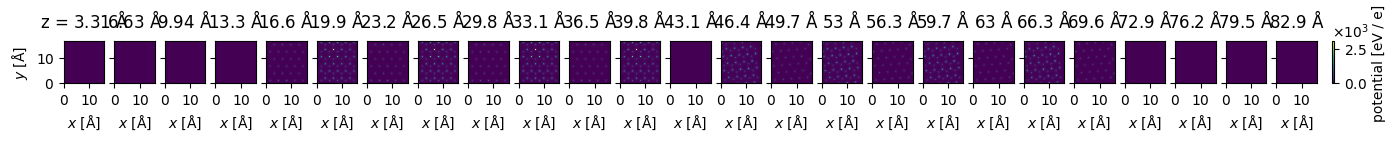

In [37]:
## Storing the ABTEM Potential as h5 file for later comparison to the MS potential

# get array from potential object
test = potential[0:potential.num_slices].show(    project=False,
    explode=True,
    figsize=(16, 5),
    common_color_scale=True,
    cbar=True,
)
test2 = test._measurements
potential_slices = test2._array
len(potential_slices)
# vars(test2)

# write to h5 file --> for now just store last iteration 50
import h5py
h5f = h5py.File(os.path.join(output_folder,"Abtem_Potential.h5"), 'w')
h5f.create_dataset('abtem_potential', data=potential_slices)#
h5f.close()

# locals()

In [1]:
#create STEM Probe - 200 kV - 21 mrad Aperture, -50 um spheriacal abberation, defocus of 50 A
probe = abtem.Probe(
    energy=energy,
    semiangle_cutoff=semiangle_cutoff,
    C10=defocus,
    Cs=-50e-6 * 1e10,
)

probe.grid.match(potential)

print(f"defocus = {probe.aberrations.defocus} Å")
print(f"FWHM = {probe.profiles().width().compute()} Å")

#plot the probe profile
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
probe.show(ax=ax1)
probe.profiles().show(ax=ax2);


#apply detector settings for sampling
num_detector_pixels = 48 # px
maximum_scattering_angle_mrad = 60 # mrad
scan_step_size = 0.4 # ang
resample = 2*maximum_scattering_angle_mrad/num_detector_pixels
#detector
pixelated_detector = abtem.PixelatedDetector(
    max_angle=maximum_scattering_angle_mrad*0.975,
    resample=(resample,resample)
)

#setup grid scan
grid_scan = abtem.GridScan(
    sampling=scan_step_size,  
    start=[0, 0],
    end=[1, 1],
    fractional=True,
    potential=potential,
)

fig, ax = abtem.show_atoms(moire)
grid_scan.add_to_plot(ax)

plt.show()

NameError: name 'abtem' is not defined

In [39]:
#compute the measurement
print(
    f"Maximum simulated scattering angle = {min(probe.cutoff_angles):.1f} mrad"
)

measurements = probe.scan(potential, scan=grid_scan, detectors=pixelated_detector)
measurements.compute()

Maximum simulated scattering angle = 138.5 mrad
[########################################] | 100% Completed | 15.29 ss


## Visualize the simulation results

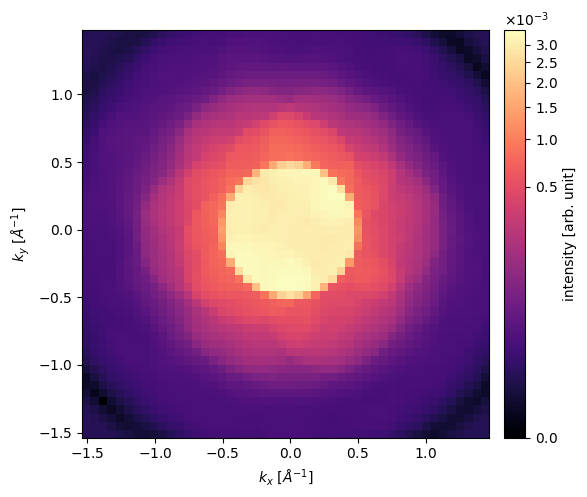

In [40]:
# no noise here
measurements.mean((0,1)).show(power=0.25,cmap='magma',cbar=True);

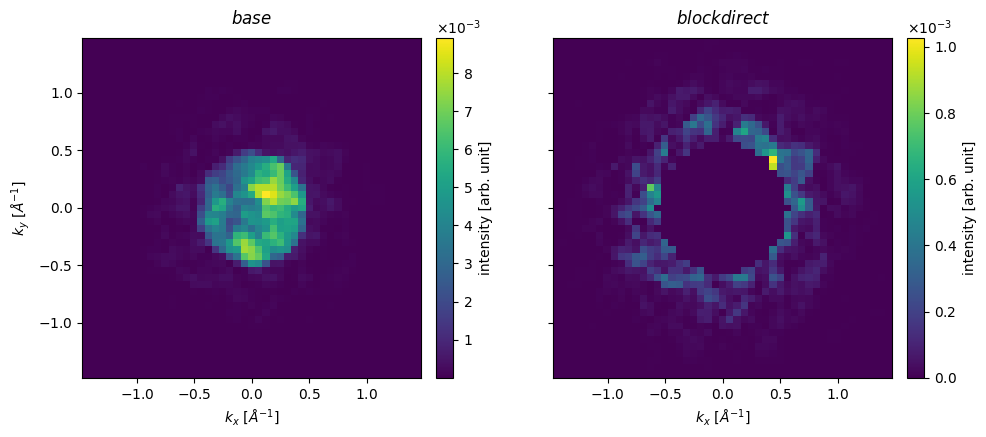

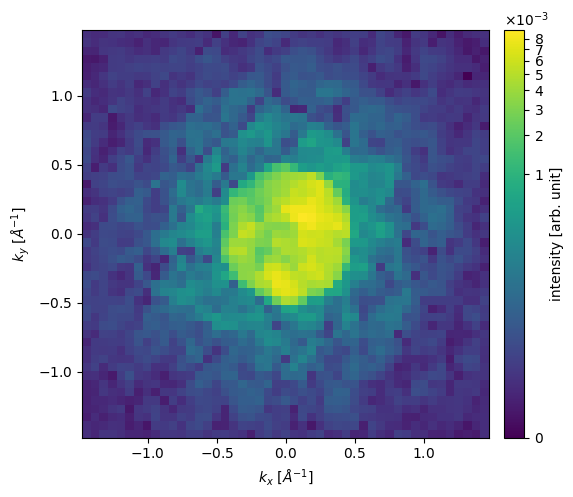

In [41]:
#visualize diffration pattern

cropped_diffraction_pattern = measurements[1, 1].crop(max_angle=60)

abtem.stack(
    [
        cropped_diffraction_pattern,
        cropped_diffraction_pattern.block_direct(),
    ],
    ("base", "block direct"),
).show(explode=True, cbar=True, figsize=(12, 4));

cropped_diffraction_pattern.show(power=0.2, cbar=True);

plt.show()

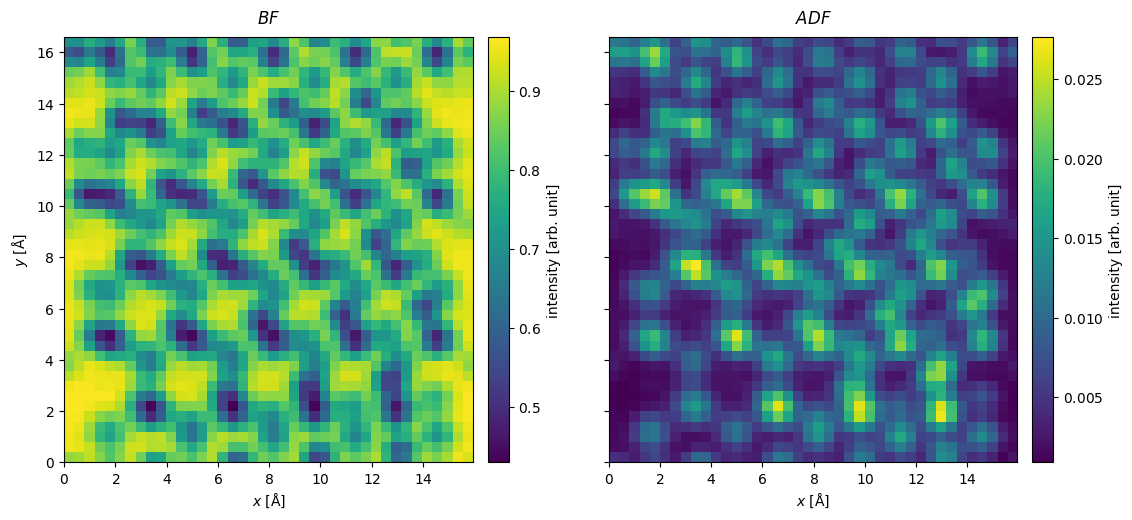

In [42]:
# HAADF preview

stacked = abtem.stack(
    [
        measurements.integrate_radial(0, 30),
        measurements.integrate_radial(50, 60),
        
    ],
    ("BF", "ADF"),
)

stacked.show(explode=True, cbar=True, figsize=(20, 5));
plt.show()

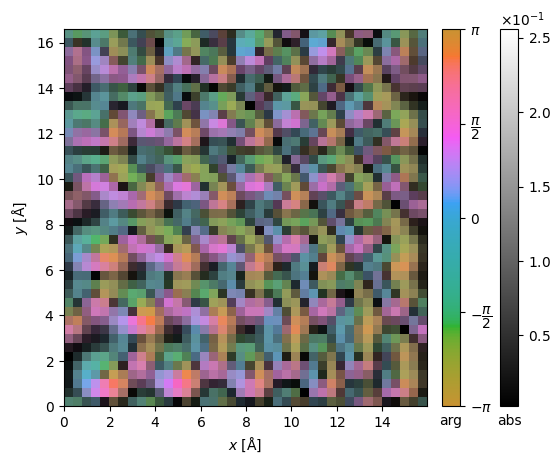

In [43]:
#check sampling with COM
center_of_mass = measurements.center_of_mass(units="1/Å")

# interpolated_center_of_mass = center_of_mass.interpolate(0.05)
# interpolated_center_of_mass = center_of_mass.interpolate(0.05).tile((10, 1))

center_of_mass.show(cbar=True);

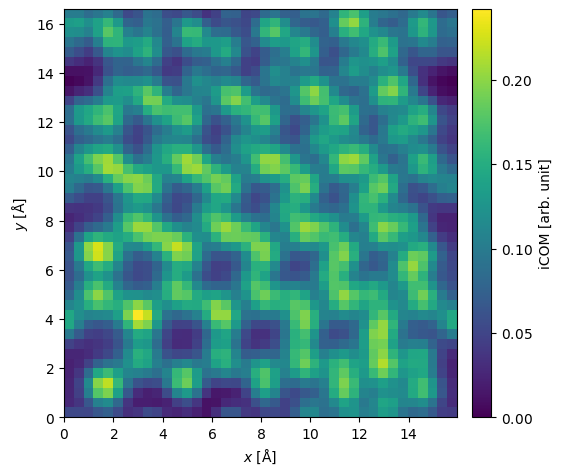

In [44]:
#
integrated_gradient = center_of_mass.integrate_gradient()

# interpolated_integrated_gradient = integrated_gradient.interpolate(0.05)

integrated_gradient.show(cbar=True);
plt.show()

## Visualize Simulation with py4dstem

In [45]:
# save as py4dstem datacube
datacube = py4DSTEM.DataCube(measurements.array)
datacube.calibration.set_R_pixel_size(scan_step_size)
datacube.calibration.set_R_pixel_units('A')
datacube.calibration.set_Q_pixel_size(measurements.angular_sampling[0])
datacube.calibration.set_Q_pixel_units('mrad')
datacube.calibration
print(datacube.calibration)
print((num_detector_pixels//4,)*2)

# save as h5 for py4dstem workflow
save_path_h5: str = os.path.join(output_folder,"Py4dstem.h5") 

py4DSTEM.save(
    save_path_h5,
    datacube,
    mode='o'    # write' mode
)


Calibration( A Metadata instance called 'calibration', containing the following fields:

             Q_pixel_size:    2.617404559218494
             R_pixel_size:    0.4
             Q_pixel_units:   mrad
             R_pixel_units:   A
             QR_flip:         False
)
(12, 12)


In [46]:
# load here, if no new calculation is needed

# path of saved data
save_path_h5: str = os.path.join(output_folder,"Py4dstem.h5") 

datacube = py4DSTEM.read(
    save_path_h5
)

Warning, vmin not provided, setting minimum intensity = 1.2636796e-06
Warning, vmax not provided, setting maximum intensity = 0.0034851087
Warning, vmin not provided, setting minimum intensity = 1.2636796e-06
Warning, vmax not provided, setting maximum intensity = 0.0034851087
probe_radius_pixels: 8.029751577668137 center_vacuum (23.992775989258742, 24.943701106330177)


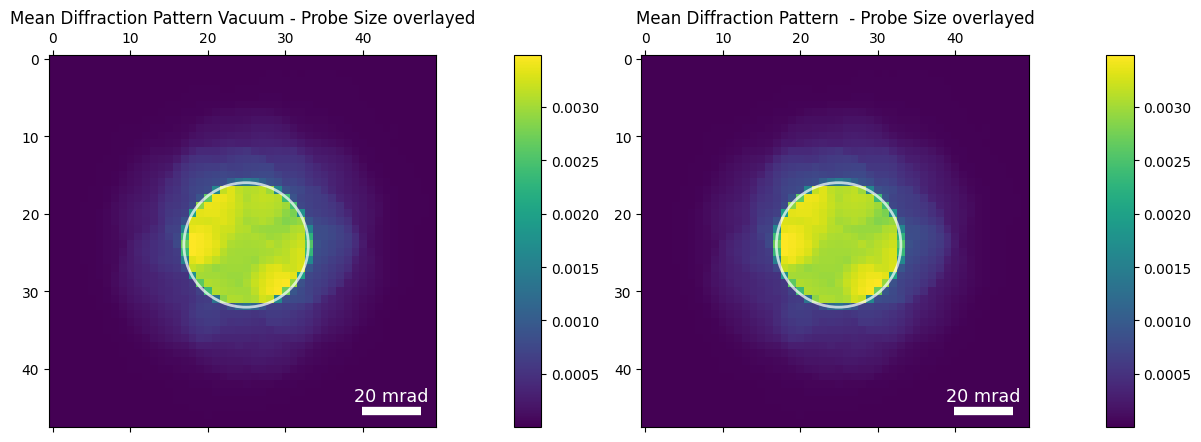

In [47]:
# Get beam size from Vacuum image or from mean dp of dataset

#get the mean dp
probe = datacube.get_dp_mean()

#calibration
probe_radius_pixels, probe_qx0, probe_qy0 = datacube.get_probe_size(probe.data)

#show with determied size as overlay
center = (probe_qx0, probe_qy0)

dp_mean = datacube.get_dp_mean()

#
show(
    [probe,
     dp_mean],
    show_cbar=True,
    cmap='viridis',
    intensity_range='absolute',
    circle = {'center':center,
      'R': probe_radius_pixels,
      'alpha':0.7,
      'fill':False,
      'color':'w',
    },
    # vmin=50,
    # vmax=200,
    # scaling='lin',
    scalebar = True,
    title = [
        'Mean Diffraction Pattern Vacuum - Probe Size overlayed',
        'Mean Diffraction Pattern  - Probe Size overlayed',
    ],
        
)
print("probe_radius_pixels:", probe_radius_pixels, "center_vacuum", center)

100%|██████████| 1680/1680 [00:00<00:00, 165114.60it/s]


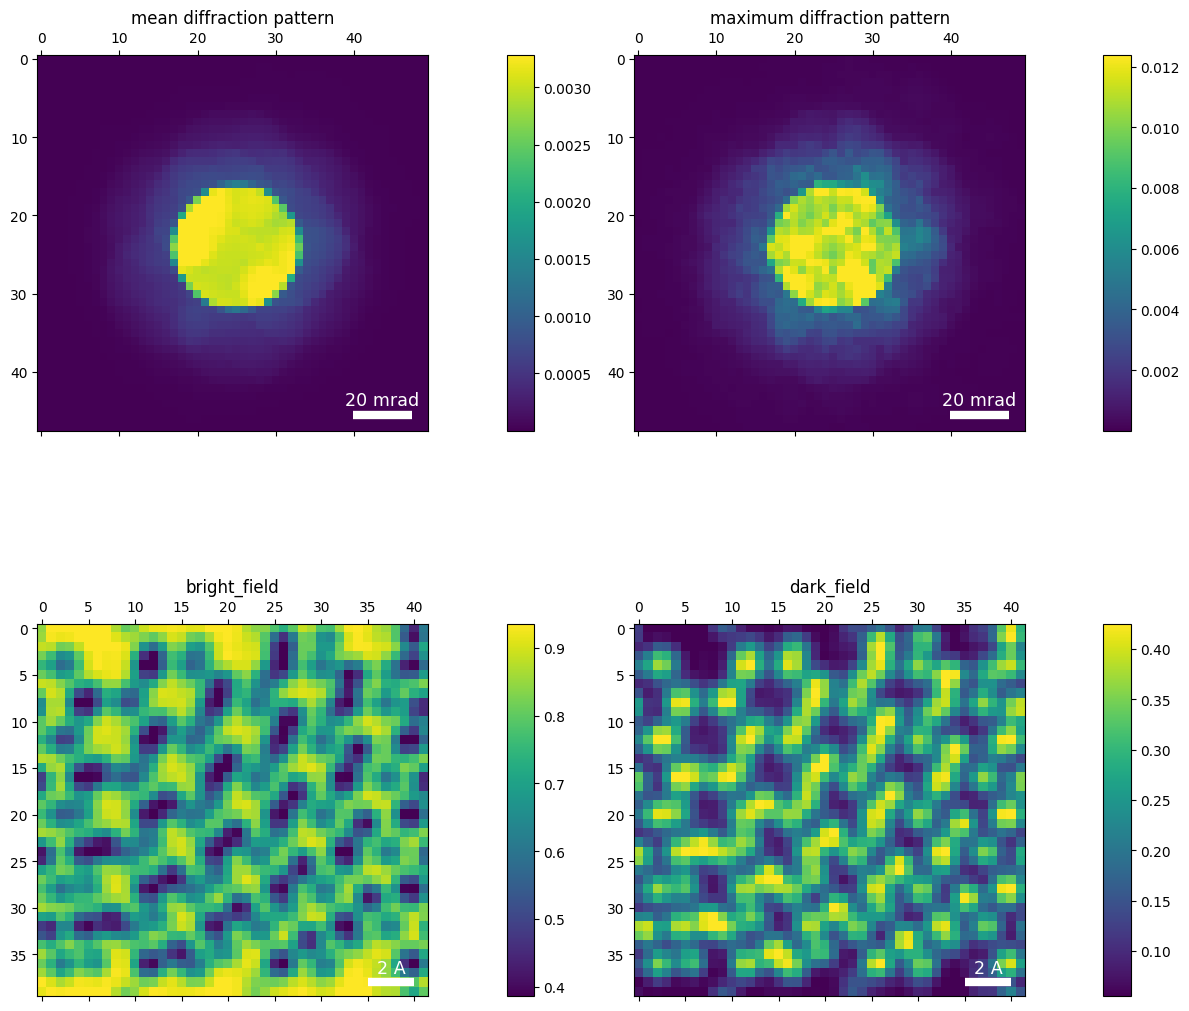

In [48]:
# calculate Bright and Dark Field images
expand_BF = 2

center = (probe_qx0, probe_qy0)
radius_BF = probe_radius_pixels + expand_BF
radii_DF = (probe_radius_pixels + expand_BF, 1e3)

bright_field = datacube.get_virtual_image(
    mode = 'circle',
    geometry = (center,radius_BF),
    name = 'bright_field',
    shift_center = False,
)

dark_field = datacube.get_virtual_image(
    mode = 'annulus',
    geometry = (center,radii_DF),
    name = 'dark_field',
    shift_center = False,
)

dp_max = datacube.get_dp_max()

##visualize ---> make output nice

show(
    [
       [
           datacube.tree('dp_mean'),
           datacube.tree('dp_max'),
       ],
        [
            datacube.tree('bright_field'),
            datacube.tree('dark_field'),
        ],
    ],
    show_cbar=True,
    # figax=(fig, axs[0, 0]),
    cmap='viridis',
    scalebar=True,
    title=[
        'mean diffraction pattern',
        'maximum diffraction pattern',
        'bright_field',
        'dark_field',
    ],
)


Best fit rotation forced to 0 degrees.
Transpose of intensities forced to False.
Normalizing amplitudes: 100%|██████████| 1680/1680 [00:00<00:00, 14545.55probe position/s]


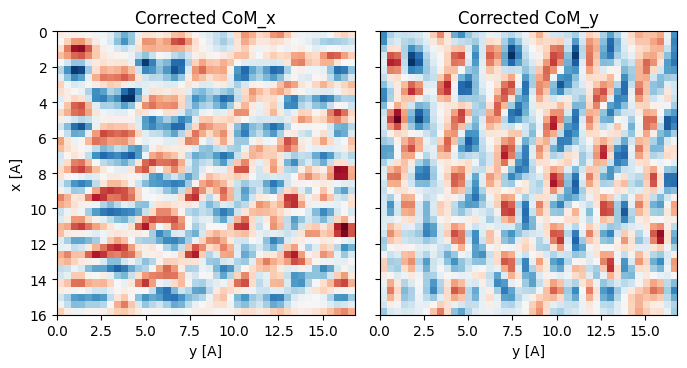

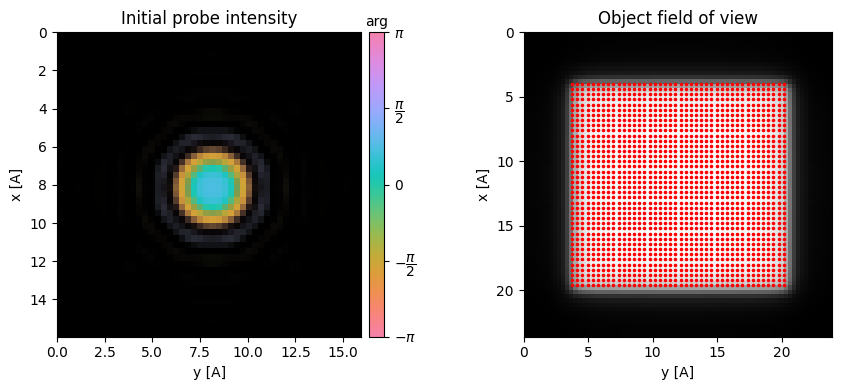

In [49]:
#SSP
#### Single Slice Pytchography

# #calibration
energy_in_V = 80e3 #80kV
semiangle_cutoff = 21
defocus = 50
object_padding_px =(48/4,48/4)*2 # object_padding_px=(num_detector_pixels//4,)*2, from detector pixels

#initialize
ptycho = py4DSTEM.process.phase.SingleslicePtychography(
    datacube=datacube,
    energy = energy_in_V,
    semiangle_cutoff = semiangle_cutoff,
    # object_padding_px=(64,64), # can be set low since sample is almost in focus to save memory
    object_padding_px=object_padding_px, # object_padding_px=(num_detector_pixels//4,)*2,
    defocus = defocus,
    object_type='potential', #pure phase object since it is a thin material

).preprocess(
    plot_center_of_mass = True,
    plot_rotation = False,
    # plot_probe_overlaps = True,
    force_com_rotation = 0,
    force_com_transpose = False, # None
)


Performing 50 iterations using a complex object type, with the GD algorithm, with normalization_min: 1 and step _size: 0.125.
Reconstructing object and probe: 100%|██████████| 50/50 [00:36<00:00,  1.36 iter/s]


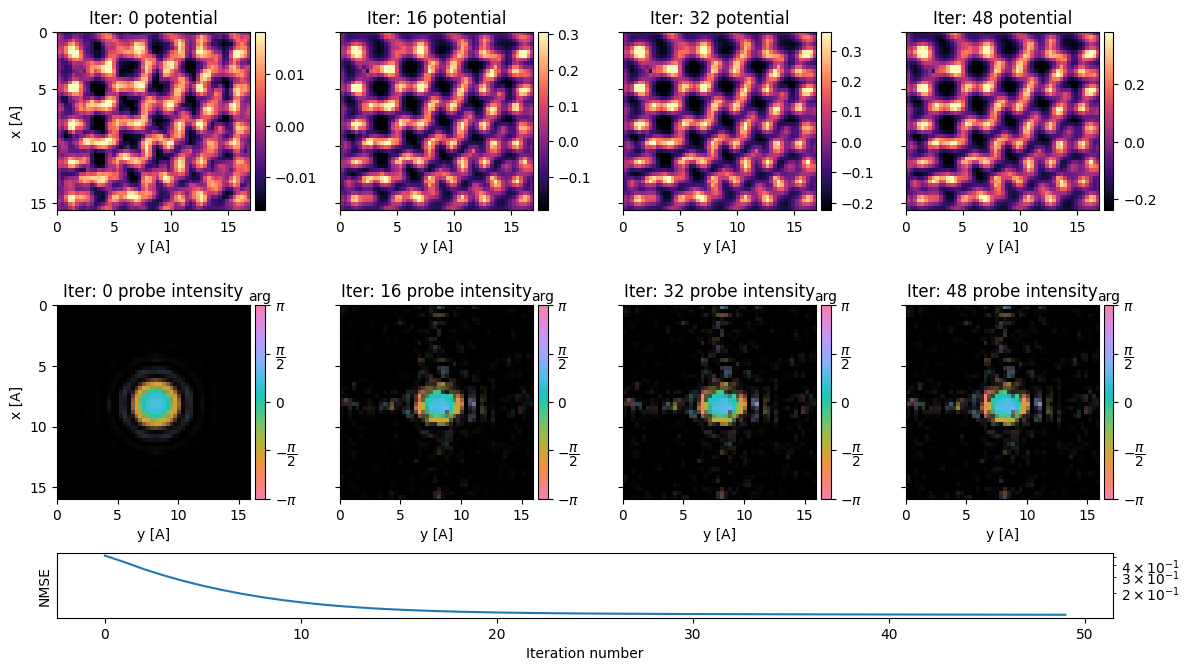

In [50]:
# pytcho SS tuning

ptycho = ptycho.reconstruct( 
    reconstruction_method = 'GD',
    num_iter = 50,
    step_size=0.125,
    # step_size=0.5,
    # gaussian_filter_sigma = 0.15,
    gaussian_filter = False, # set to False
    object_positivity = True,
    reset = True,
    object_type = 'complex',
    store_iterations = True,
    # pure_phase_object = True,
).visualize(
    iterations_grid='auto',
    # plot_fourier_probe = True,
    
)

In [51]:
#show error of reconstruction as value
ptycho.error

0.11495247836915091

## Short section for storage of the evaluation data

In [52]:
#create new Root to store the evaluation data seperately
saved_evaluations = py4DSTEM.Root("evaluations")

In [53]:
#add all calculations to the evaluation tree // add --> to add unrooted node // -- graft to transfer rooted node
saved_evaluations.tree(add=ptycho)
saved_evaluations.tree(graft=dp_mean)
saved_evaluations.tree(graft=bright_field)
saved_evaluations.tree(graft=dark_field)
saved_evaluations.tree(graft=dp_max)

Root( A Node called 'evaluations', containing the following top-level objects in its tree:

          ptychographic_reconstruction 	 (SingleslicePtychography)
          dp_mean                  	 (VirtualDiffraction)
          bright_field             	 (VirtualImage)
          dark_field               	 (VirtualImage)
          dp_max                   	 (VirtualDiffraction)
)

In [54]:
#all in here
saved_evaluations.tree()

/
|---ptychographic_reconstruction
|---dp_mean
|---bright_field
|---dark_field
|---dp_max


In [73]:
# this will be empty
datacube.tree()


/


In [74]:
# store calibration data to variable
calibration_data = datacube.calibration

calibration_data

Calibration( A Metadata instance called 'calibration', containing the following fields:

             Q_pixel_size:      2.617404559218494
             R_pixel_size:      0.4
             Q_pixel_units:     mrad
             R_pixel_units:     A
             QR_flip:           False
             _root_treepath:    
             probe_semiangle:   7.941290496639571
             qx0_mean:          23.99974746398367
             qy0_mean:          24.997854838854927
)

In [75]:
# read out the calibration data
saved_evaluations.metadata


{'calibration': Calibration( A Metadata instance called 'calibration', containing the following fields:
 
              Q_pixel_size:      2.617404559218494
              R_pixel_size:      0.4
              Q_pixel_units:     mrad
              R_pixel_units:     A
              QR_flip:           False
              _root_treepath:    
              probe_semiangle:   7.941290496639571
              qx0_mean:          23.99974746398367
              qy0_mean:          24.997854838854927
 )}

In [55]:
## testing saving and loding of the data

# save as h5 for py4dstem workflow
save_path_h5_evaluations: str = os.path.join(output_folder,"Py4dstem_evaluations.h5")

py4DSTEM.save(
    save_path_h5_evaluations,
    saved_evaluations,
    mode='o'    # write' mode
)

In [36]:
# load the evaluation data
evaluations = py4DSTEM.read(
    save_path_h5_evaluations,
)




In [37]:
evaluations.tree()

/
|---bright_field
|---dark_field
|---dp_max
|---dp_mean
|---ptychographic_reconstruction


## Multislice section

In [56]:
## set_the_output_folder

run_number = "013"
output_folder = os.path.join("/masc_shared/ag_volz/Oliver_Maßmeyer/MS_Ptycho/", run_number)
#create the folder --> throws error if already existing
os.mkdir(output_folder)

FileExistsError: [Errno 17] File exists: '/masc_shared/ag_volz/Oliver_Maßmeyer/MS_Ptycho/013'

Best fit rotation forced to 0 degrees.
Normalizing amplitudes: 100%|██████████| 1680/1680 [00:00<00:00, 15024.82probe position/s]


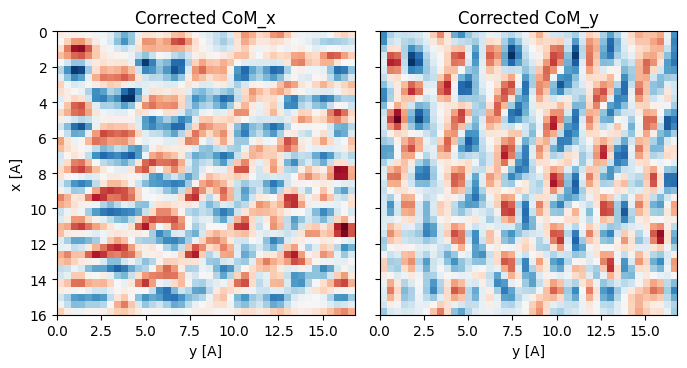

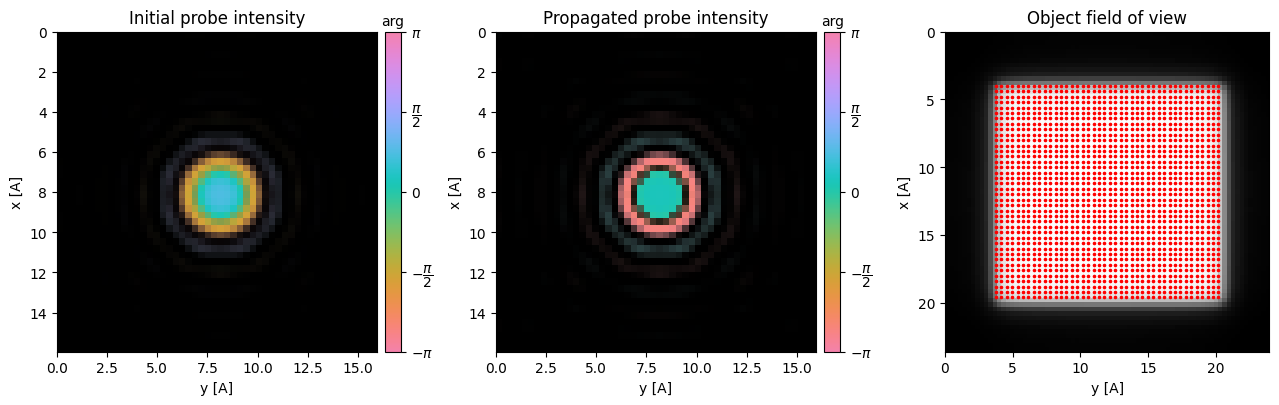

In [83]:
## Testing Multislice pytchography
ms_ptycho = py4DSTEM.process.phase.MultislicePtychography(
    datacube=datacube,
    # num_slices=num_slices,
    num_slices=12,
    slice_thicknesses=slice_thicknesses, #can also pass an array for different slice thicknesses
    verbose=True,
    energy=energy_in_V,
    defocus=defocus,
    semiangle_cutoff=semiangle_cutoff,
    object_padding_px=object_padding_px,
    # initial_object_guess=, #can add a complex valued object for the initial guess
    # initial_probe_guess=, #initial probe guess as compley-valued probe
    # initial_scan_positions=, #initial scan posiitons np.ndarray
    # middle_focus # to be added if sample should be focused in the center
    # device='gpu',
    #positions_mask=None, # to skip parts of the datacube
    #device: str = 'cpu', # to change to gpu if testet
    
).preprocess(
    plot_center_of_mass = True,
    plot_rotation = False,
    plot_probe_overlaps = True,
    force_com_rotation = 0, # is simulation
    force_com_transpose = None, # None
)

Performing 100 iterations using a potential object type, with the GD algorithm, with normalization_min: 1 and step _size: 0.125.
Reconstructing object and probe: 100%|██████████| 100/100 [12:21<00:00,  7.41s/ iter]


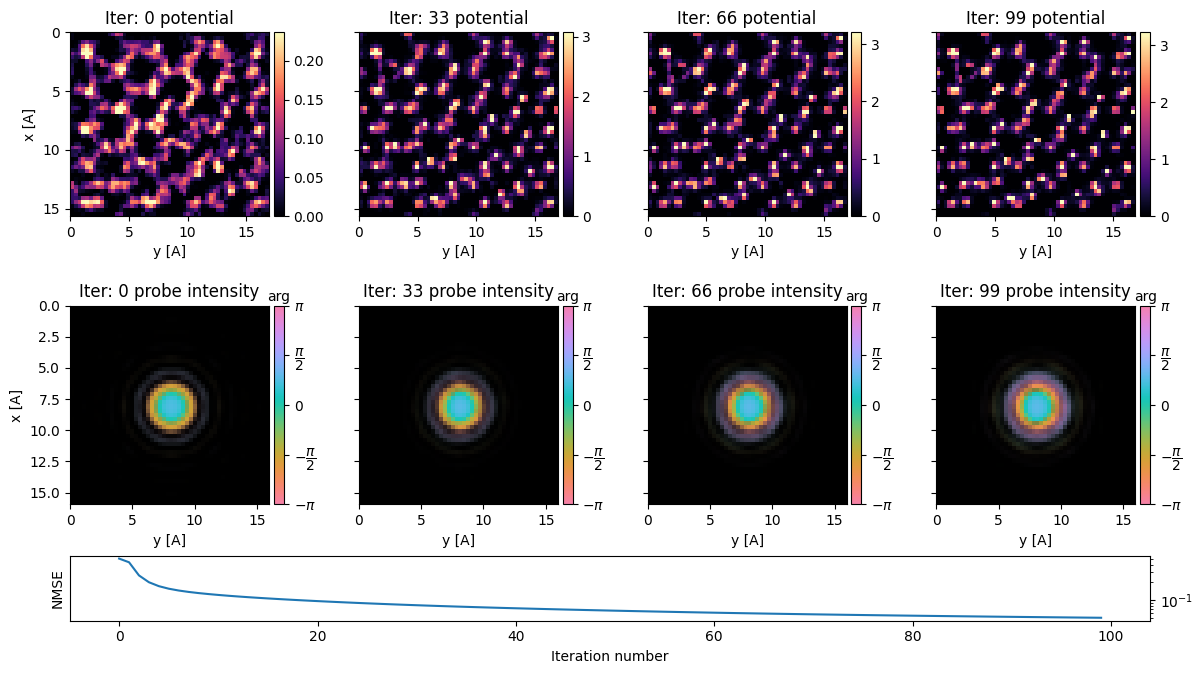

In [84]:
ms_ptycho = ms_ptycho.reconstruct(
    reconstruction_method = 'GD',
    num_iter =100,
    # num_iter = 5, # test saving
    step_size=0.125,
    # gaussian_filter_sigma = 0.15,
    gaussian_filter = False, # set to False
    object_positivity = True,
    reset = True,
    # object_type = 'complex',
    object_type = 'potential',
    store_iterations = True,
    # store_iterations = False,
).visualize(
    iterations_grid = 'auto',
)

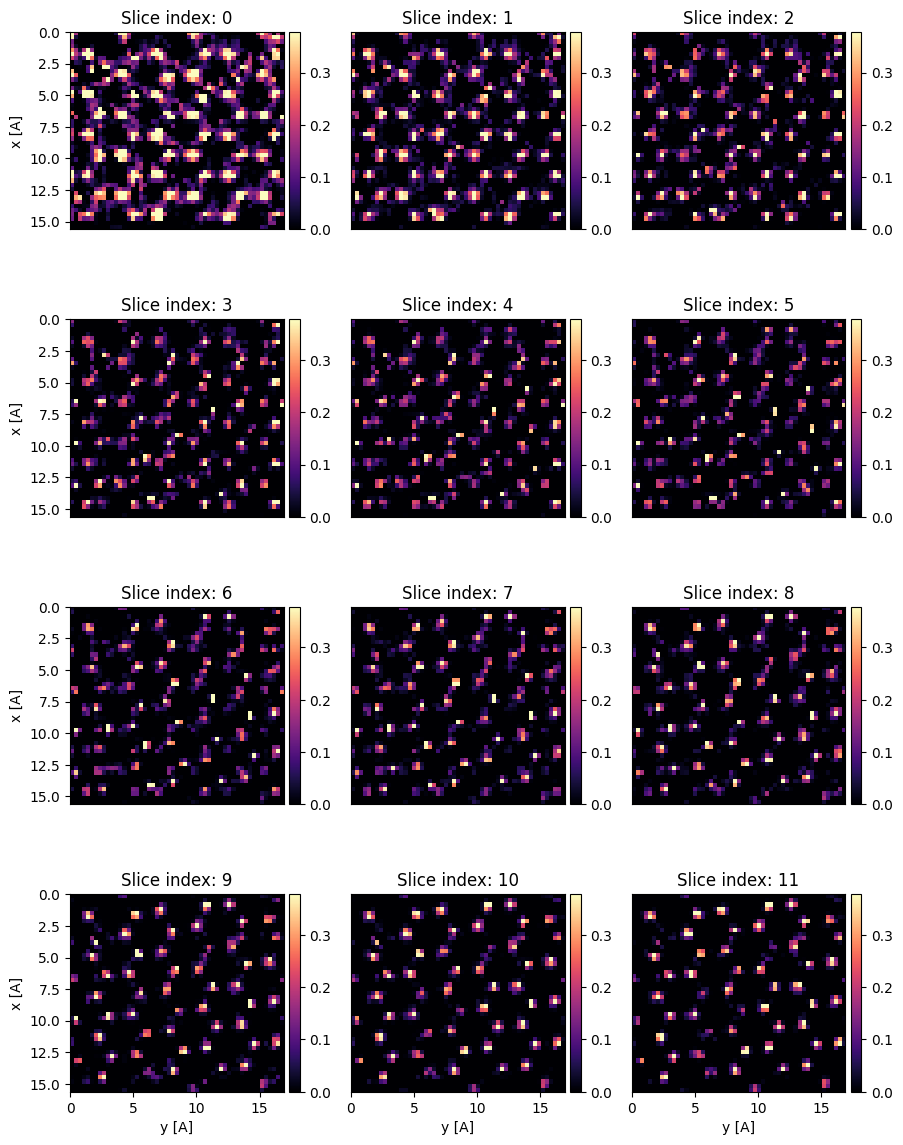

In [85]:
ms_ptycho.show_slices()

In [86]:
## gives a value for the quality of the reconstruction: error < 0.05 good, 200 iterations: < 0.005
ms_ptycho.error

0.04975253832176995

## Storage of the MS_pytchography results to h5 for now

- add a descriptive name for the set ms_pytchography parameters
- example: NameOfPy4dstemDataset_MulitslicePytchography_#slices_#iterations
- with Abbreviations: NameOfPy4dstemDataset_MSpty_10sl_50iter.h5
- for now store everything, later we will know what is needed, somehow the metadata is empty???

In [87]:
# write to h5 file --> for now just store last iteration 50
import h5py
h5f = h5py.File(os.path.join(output_folder,"Moire_vacuum15_MSpty_12sl_100iter.h5"), 'w')

h5f.create_dataset('angular_sampling', data=ms_ptycho.angular_sampling)#
h5f.create_dataset('error', data=ms_ptycho.error)#
h5f.create_dataset('error_iterations', data=ms_ptycho.error_iterations)#
h5f.create_dataset('object', data=ms_ptycho.object)#
h5f.create_dataset('object_cropped', data=ms_ptycho.object_cropped)#
h5f.create_dataset('object_fft', data=ms_ptycho.object_fft)#
h5f.create_dataset('object_iterations', data=ms_ptycho.object_iterations)#
h5f.create_dataset('positions', data=ms_ptycho.positions)#
h5f.create_dataset('probe', data=ms_ptycho.probe)#
h5f.create_dataset('probe_centered', data=ms_ptycho.probe_centered)#
h5f.create_dataset('probe_fourier', data=ms_ptycho.probe_fourier)#
h5f.create_dataset('probe_fourier_residual', data=ms_ptycho.probe_fourier_residual)#
h5f.create_dataset('probe_iterations', data=ms_ptycho.probe_iterations)#
h5f.create_dataset('sampling', data=ms_ptycho.sampling)#
# h5f.create_dataset('treekeys', data=ms_ptycho.treekeys)# empty
# h5f.create_dataset('metadata', data=ms_ptycho.metadata)#empty
h5f.create_dataset('name', data=ms_ptycho.name)#
h5f.close()


## Additional MS readout

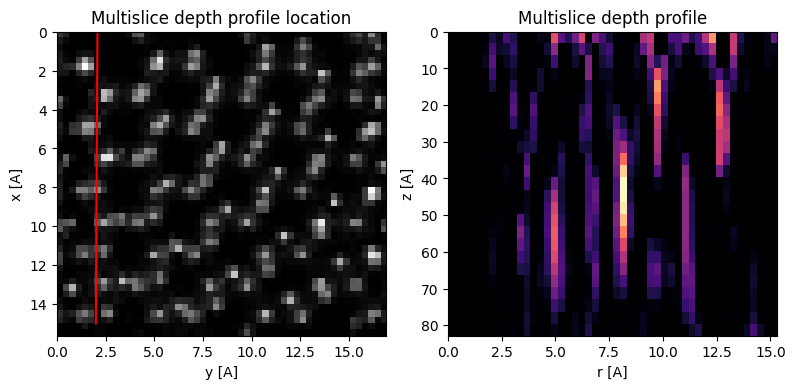

In [82]:
# has build in depth sectioning 
ms_ptycho.show_depth_section(
    # ptA=[0,1.5],
    # ptB=[20,1.5],
# 
    ptA=[0,2],
    ptB=[20,2],
    aspect_ratio = 'auto',
    plot_line_profile = True,
    ms_object=None,
    specify_calibrated = True,
    gaussian_filter_sigma = None,
    cbar = True,
) # function to show depth profiles

In [ ]:
ms_ptycho.

In [140]:
import emdfile as emd
##cool tutorial on emd files https://github.com/py4dstem/emdfile/blob/main/tutorials/emdfile_intro_example.ipynb

In [145]:
test_emd = emd.Array( data=np.ones((20,20,256,256)), name='max')
test_emd.to_h5()

'max'

In [142]:

## i do net get this functionn yet, should be possible to add it to an existing emd file group, not sure if one is supposed to use this
test2 = ms_ptycho.to_h5(test_emd)

AttributeError: 'Array' object has no attribute 'create_group'

In [143]:
dataset = group.create_dataset(
    "some_name",
    shape = (8,8),
    dtype = h5py.special_dtype( vlen = 'uint16' )
)

NameError: name 'group' is not defined

In [ ]:
## interseing functionalities

ms_ptycho.cross_correlate_amplitudes_to_probe_aperture()

ms_ptycho.reinitialize_parameters() ## redoing reconstruction with different parameters

ms_ptycho.set_save_defaults()

ms_ptycho.set_storage()

ms_ptycho.show_depth_section() # function to show depth profiles


ms_ptycho.show_uncertainty_visualization()

ms_ptycho.show_updated_positions()

ms_ptycho.to_h5()


## Additional MS ptycho runs

Best fit rotation forced to 0 degrees.
Normalizing amplitudes: 100%|██████████| 1680/1680 [00:07<00:00, 219.45probe position/s]


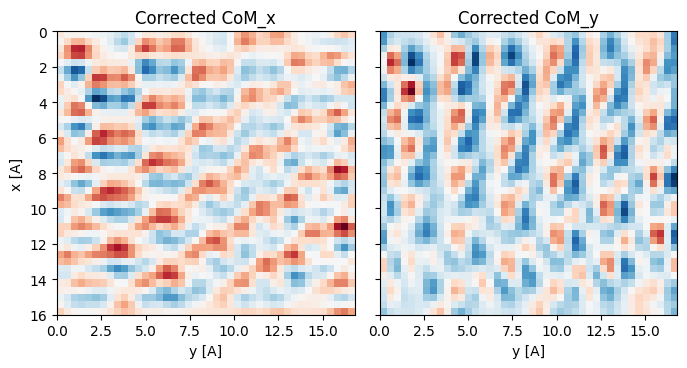

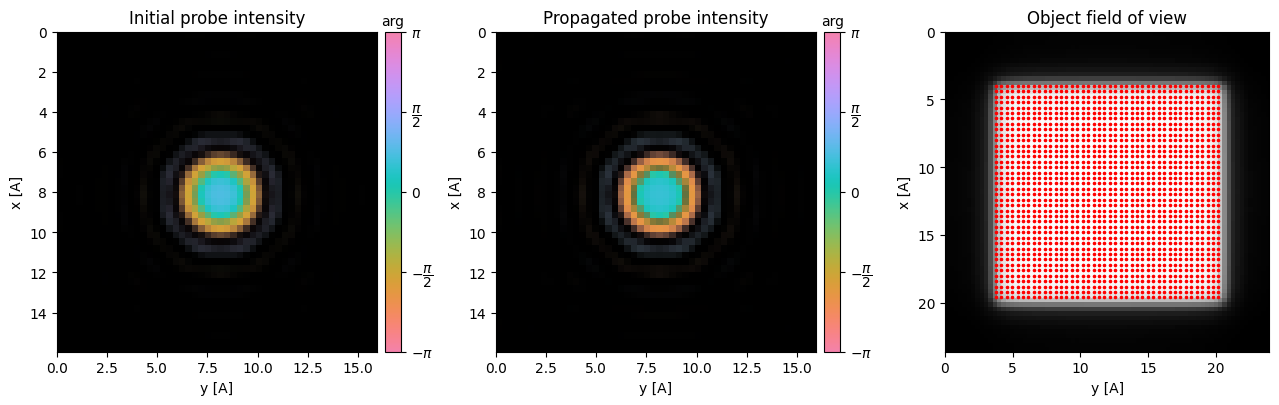

In [162]:
## test more slices 
ms_ptycho = py4DSTEM.process.phase.MultislicePtychography(
    datacube=datacube,
    num_slices=num_slices*2,
    slice_thicknesses=slice_thicknesses/2,
    verbose=True,
    energy=energy_in_V,
    defocus=defocus,
    semiangle_cutoff=semiangle_cutoff,
    object_padding_px=object_padding_px,
    # device='gpu',
).preprocess(
    plot_center_of_mass = True,
    plot_rotation = False,
    plot_probe_overlaps = True,
    force_com_rotation = 0, # is simulation
    force_com_transpose = None, # None
)

Performing 50 iterations using a potential object type, with the GD algorithm, with normalization_min: 1 and step _size: 0.125.
Reconstructing object and probe: 100%|██████████| 50/50 [10:02<00:00, 12.05s/ iter]


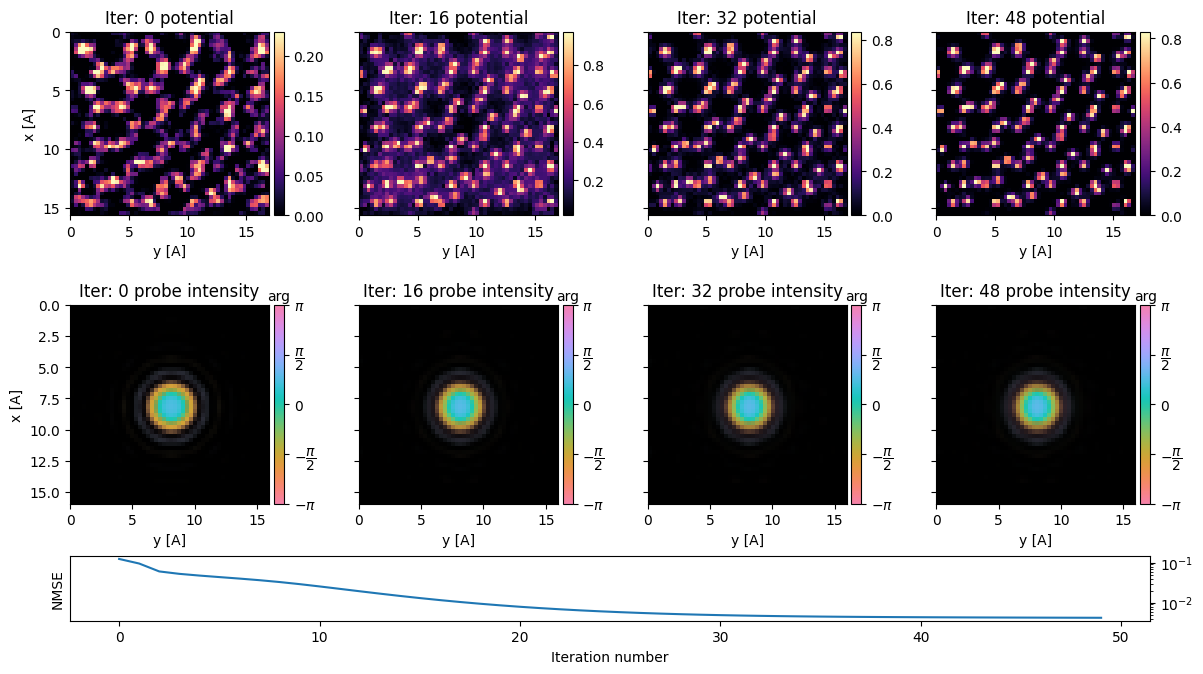

In [163]:
ms_ptycho = ms_ptycho.reconstruct(
    reconstruction_method = 'GD',
    num_iter = 50,
    step_size=0.125,
    gaussian_filter = False, # set to False
    object_positivity = True,
    reset = True,
    # object_type = 'complex',
    object_type = 'potential',
    store_iterations = True,
    # store_iterations = False,
).visualize(
    iterations_grid = 'auto',
)

## Testing the data storage of the MS pytchography

In [131]:
test = ms_ptycho.object_fft
test

array([[1.04304152, 1.16348889, 1.50855395, ..., 0.98540285, 0.27386435,
        0.97324515],
       [0.97584529, 0.39465185, 1.58668668, ..., 3.08601839, 2.32649257,
        1.43171326],
       [2.62443471, 1.69378139, 2.40807396, ..., 1.46404784, 2.16236998,
        1.48983988],
       ...,
       [1.48983988, 2.16236998, 1.46404784, ..., 2.40807396, 1.69378139,
        2.62443471],
       [1.43171326, 2.32649257, 3.08601839, ..., 1.58668668, 0.39465185,
        0.97584529],
       [0.97324515, 0.27386435, 0.98540285, ..., 1.50855395, 1.16348889,
        1.04304152]])

In [222]:
ms_ptycho.object_fft

array([[0.19716487, 0.04041014, 0.06664352, ..., 0.32615985, 0.32192007,
        0.11848026],
       [0.31929147, 0.29808351, 0.29452845, ..., 0.53979039, 0.16620412,
        0.21279211],
       [0.24412393, 0.44100152, 0.22685469, ..., 0.15438874, 0.36924751,
        0.42212949],
       ...,
       [0.42212949, 0.36924751, 0.15438874, ..., 0.22685469, 0.44100152,
        0.24412393],
       [0.21279211, 0.16620412, 0.53979039, ..., 0.29452845, 0.29808351,
        0.31929147],
       [0.11848026, 0.32192007, 0.32615985, ..., 0.06664352, 0.04041014,
        0.19716487]])

In [135]:
len(ms_ptycho.object_iterations[1])

10

In [147]:
len(ms_ptycho.object[1])

71

In [158]:
len(ms_ptycho.object_cropped[1])

47

In [125]:
# test save as txt
save_path_ms_ptycho: str = "/masc_shared/ag_volz/Py4dSTEM_tutorial-data/002_WS2_Moire_evaluations_msptycho.txt"

np.savetxt(save_path_ms_ptycho,ms_ptycho.object_iterations)


ValueError: Expected 1D or 2D array, got 4D array instead

In [124]:
# to do: save everything besides the multislice pytcho --> it throws an error while saving i hate it !!!!!!!!!
save_path_ms_ptycho: str = "/masc_shared/ag_volz/Py4dSTEM_tutorial-data/002_WS2_Moire_evaluations_msptycho.txt"

#need to convert the list of np arrays to a numpy array
arr = np.array(ms_ptycho.object_iterations)

arr[1][1][1]

np.save(save_path_ms_ptycho,arr[1][1][1])


In [113]:
import scipy as sc

#need to convert the list of np arrays to a numpy array
arr = np.array(ms_ptycho.object_iterations)

#path to save to
save_path_ms_ptycho: str = "/masc_shared/ag_volz/Py4dSTEM_tutorial-data/002_WS2_Moire_evaluations_msptycho.mat"

#conversion to dict

d = dict(enumerate(arr))
d

sc.io.savemat(save_path_ms_ptycho,d)


TypeError: 'int' object is not subscriptable

array([[[[0.99932986+1.04638952e-04j, 0.99932927+1.35906375e-04j,
          0.9993728 +1.22724843e-04j, ..., 0.9994127 +7.62085474e-05j,
          0.9993454 +1.34702306e-04j, 0.9993374 +1.43902944e-04j],
         [0.99940836+1.21829842e-04j, 0.99936444+1.11799018e-04j,
          0.999366  +7.09345986e-05j, ..., 0.999391  +8.13941806e-05j,
          0.99934936+8.15706517e-05j, 0.99936944+1.07357773e-04j],
         [0.99941355+2.05539545e-04j, 0.9994309 +1.68265993e-04j,
          0.9994581 +1.25079285e-04j, ..., 0.99944854+1.45048412e-04j,
          0.99944615+1.43884143e-04j, 0.9994097 +1.68573853e-04j],
         ...,
         [0.9993672 +1.07264212e-04j, 0.9994369 +1.12033020e-04j,
          0.9994865 +1.01019607e-04j, ..., 0.9994921 +6.89694934e-05j,
          0.9994634 +8.85939517e-05j, 0.9994017 +1.12065296e-04j],
         [0.99937606+2.86344948e-05j, 0.99942666+1.02286715e-04j,
          0.9994217 +9.81673002e-05j, ..., 0.99945366+8.30114368e-05j,
          0.99940526+1.00866600e-

In [107]:
type(ms_ptycho.object_iterations[1])

numpy.ndarray

In [152]:
save_path_ms_ptycho: str = "/masc_shared/ag_volz/Py4dSTEM_tutorial-data/002_WS2_Moire_evaluations_msptycho.h5"


py4DSTEM.save(
    save_path_ms_ptycho,
    ms_ptycho,
    mode='o'    # write' mode
)



IndexError: invalid index to scalar variable.

In [72]:
py4DSTEM.save??

Signature: py4DSTEM.save(filepath, data, mode='w', emdpath=None, tree=True)
Source:   
def save(filepath, data, mode="w", emdpath=None, tree=True):
    """
    Saves data to an EMD 1.0 formatted HDF5 file at filepath.

    For the full docstring, see py4DSTEM.emdfile.save.
    """
    # This function wraps emdfile's save and adds a small piece
    # of metadata to the calibration to allow linking to calibrated
    # data items on read

    cal = None
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        if hasattr(data, "calibration") and data.calibration is not None:
            cal = data.calibration
            rp = "/".join(data._treepath.split("/")[:-1])
            cal["_root_treepath"] = rp

    _save(filepath, data=data, mode=mode, emdpath=emdpath, tree=tree)

    if cal is not None:
        del cal._params["_root_treepath"]
File:      ~/.conda/envs/ABTEM/lib/python3.11/site-packages/py4DSTEM/io/save.py
Type:      function

In [182]:
datacube.tree(graft=ms_ptycho)

Root( A Node called 'datacube_root', containing the following top-level objects in its tree:

          datacube                 	 (DataCube)
)

In [29]:
datacube.tree()

/
|---dp_mean
|---bright_field
|---dark_field
|---dp_max


In [89]:
ms_ptycho_object = ms_ptycho.object

In [36]:
#add all calculations to the evaluation tree // add --> to add unrooted node // -- graft to transfer rooted node
saved_evaluations = py4DSTEM.Root("evaluations")

saved_evaluations.tree(add=ptycho)
saved_evaluations.tree(graft=dp_mean)
saved_evaluations.tree(graft=bright_field)
saved_evaluations.tree(graft=dark_field)
saved_evaluations.tree(graft=dp_max)
# saved_evaluations.tree(add=ms_ptycho)


Root( A Node called 'evaluations', containing the following top-level objects in its tree:

          ptychographic_reconstruction 	 (SingleslicePtychography)
          dp_mean                  	 (VirtualDiffraction)
          bright_field             	 (VirtualImage)
          dark_field               	 (VirtualImage)
          dp_max                   	 (VirtualDiffraction)
)

In [43]:
ms_ptycho.add_to_tree??

# saved_evaluations.tree(add=test)

Signature: ms_ptycho.add_to_tree(node)
Source:   
    def add_to_tree(self,node):
        """
        Add an unrooted node as a child of the current, rooted node.
        To move an already rooted node/branch, use `.graft()`.
        To create a rooted node, use `Root()`.
        """
        assert(isinstance(node,Node))
        assert(self.root is not None), "Can't add objects to an unrooted node. See the Node docstring for more info."
        assert(node.root is None), "Can't add a rooted node to a different tree.  Use `.tree(graft=node)` instead."
        node._root = self._root
        self._branch[node.name] = node
        node._treepath = self._treepath+'/'+node.name
File:      ~/.conda/envs/ABTEM/lib/python3.11/site-packages/emdfile/classes/tree.py
Type:      method

In [37]:
# save as h5 for py4dstem workflow
save_path_h5_evaluations: str = "/masc_shared/ag_volz/Py4dSTEM_tutorial-data/002_WS2_Moire_evaluations.h5"

py4DSTEM.save(
    save_path_h5_evaluations,
    saved_evaluations,
    mode='o'    # write' mode
)

In [34]:
saved_evaluations.tree()

/


In [33]:
# add to the evaluation tree

saved_evaluations.tree(cut='multi-slice_pytchographic_reconstruction')



AssertionError: 

In [184]:
#save to evaluation file
save_path_h5_evaluations: str = "/masc_shared/ag_volz/Py4dSTEM_tutorial-data/002_WS2_Moire_evaluations.h5"

py4DSTEM.save(
    save_path_h5_evaluations,
    datacube,
    mode='o'    # write' mode
)


IndexError: invalid index to scalar variable.

In [174]:
# store multislice separately since it does not work properly

ms_pytcho_evals = py4DSTEM.Root("ms_pytcho_evals")





In [177]:
ms_pytcho_evals.tree()

/
|---multi-slice_ptychographic_reconstruction


In [176]:
ms_pytcho_evals.tree(graft=ms_ptycho) # worked with graft after changing to complex object type

Root( A Node called 'ms_pytcho_evals', containing the following top-level objects in its tree:

          multi-slice_ptychographic_reconstruction 	 (MultislicePtychography)
)

In [178]:
#save the evaluations to the h5 evaluation file - throws error?

save_path_evaluations_ms = "/masc_shared/ag_volz/Py4dSTEM_tutorial-data/MS_Pytcho_Moire_evaluations_ms.h5"

# # append evaluation file
py4DSTEM.save(
    save_path_evaluations_ms,
    ms_pytcho_evals,
    tree = None,  # None to jsut store the datacubes tree
    mode = 'a'    # append mode
)


In [94]:
saved_evaluations.tree()

/
|---ptychographic_reconstruction
|---dp_mean
|---bright_field
|---dark_field
|---dp_max
|---multi-slice_ptychographic_reconstruction


In [94]:
saved_evaluations.tree(cut=True)

Root( A Node called 'evaluations_cut_evaluations', containing the following top-level objects in its tree:

)

In [154]:
saved_evaluations.add_to_tree(ms_ptycho)

In [91]:
saved_evaluations.tree(add=ms_ptycho_object)

NameError: name 'value' is not defined

In [162]:
#save the evaluations to the h5 evaluation file - throws error?

save_path_evaluations = "/masc_shared/ag_volz/Py4dSTEM_tutorial-data/MS_Pytcho_Moire_evaluations.h5"

# # append evaluation file
py4DSTEM.save(
    save_path_evaluations,
    saved_evaluations,
    tree = None,  # None to jsut store the datacubes tree
    mode = 'a'    # append mode
)


Performing 500 iterations using a potential object type, with the GD algorithm, with normalization_min: 1 and step _size: 0.125.
Reconstructing object and probe: 100%|██████████| 500/500 [45:33<00:00,  5.47s/ iter]


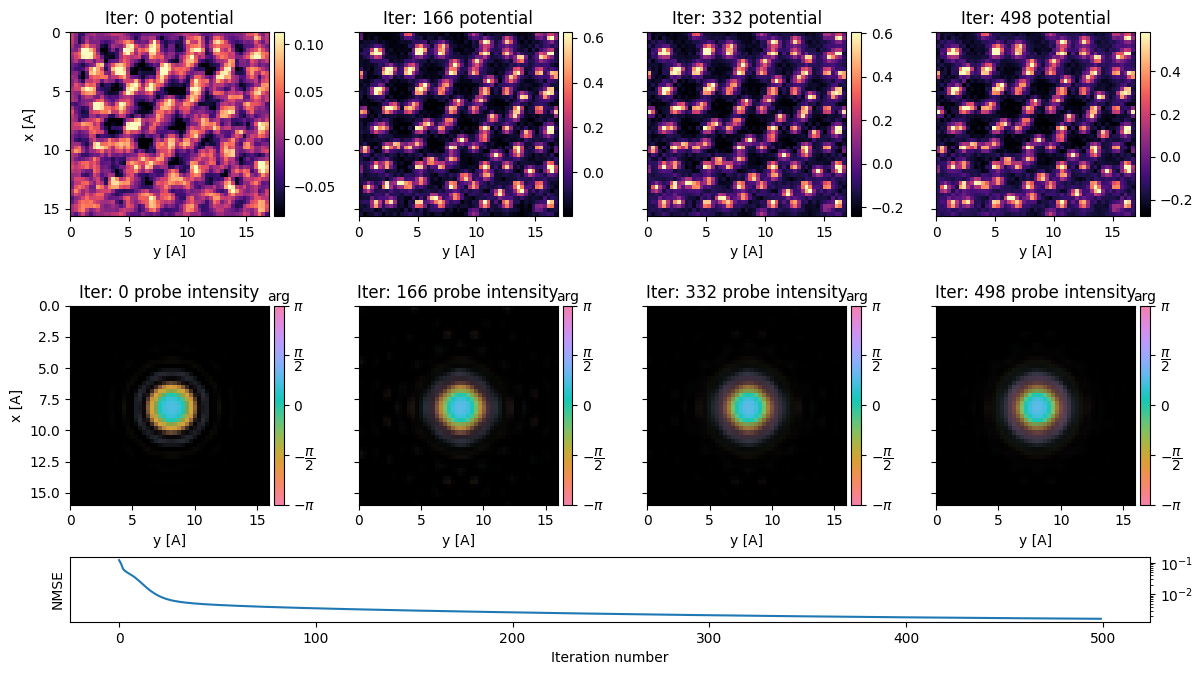

In [38]:
ms_ptycho = ms_ptycho.reconstruct(
    reconstruction_method = 'GD',
    num_iter = 500,
    step_size=0.125,
    # gaussian_filter_sigma = 0.15,
    gaussian_filter = False, # set to False
    object_positivity = True,
    reset = True,
    # object_type = 'complex',
    object_type = 'potential',
    store_iterations = True,
).visualize(
    iterations_grid = 'auto',
)

In [39]:

ms_ptycho.error

0.001643979634154801

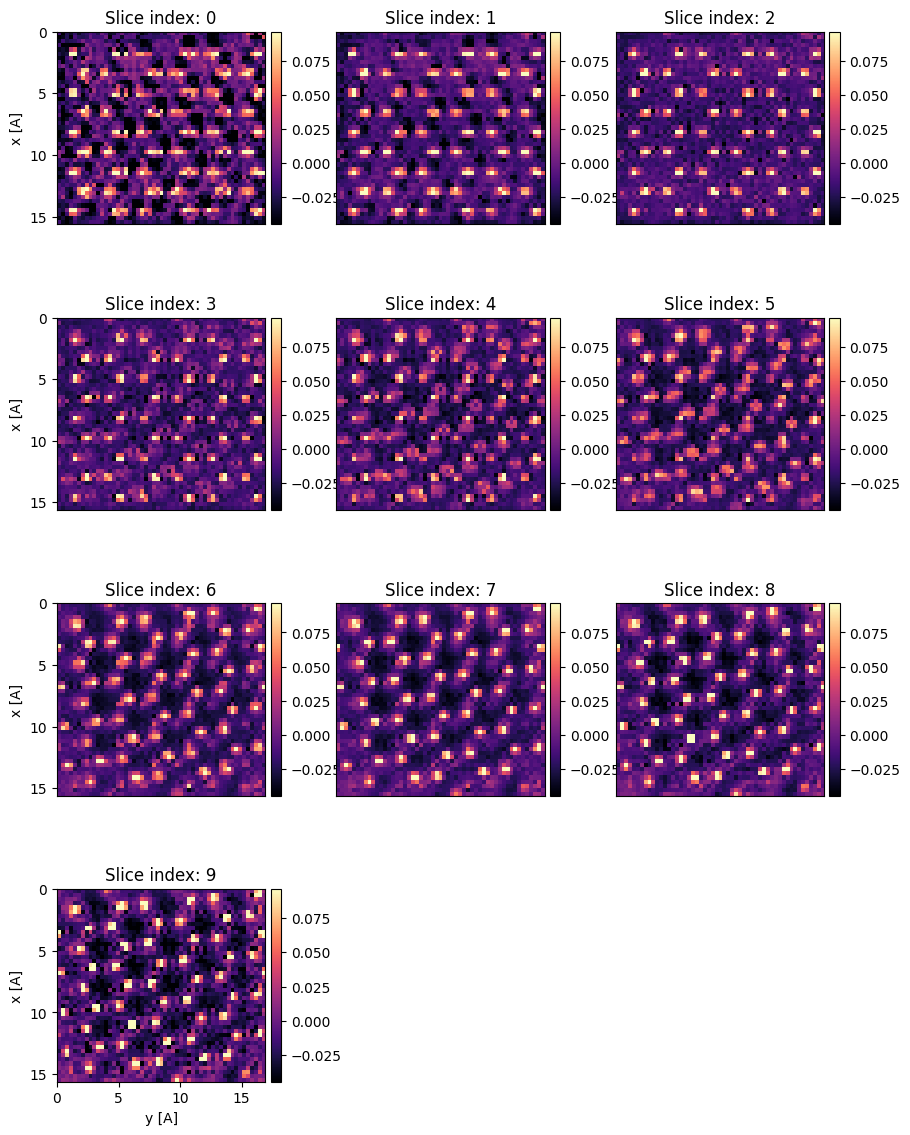

In [40]:
ms_ptycho.show_slices()

Performing 2000 iterations using a potential object type, with the GD algorithm, with normalization_min: 1 and step _size: 0.125.
Reconstructing object and probe: 100%|██████████| 2000/2000 [3:03:02<00:00,  5.49s/ iter]  


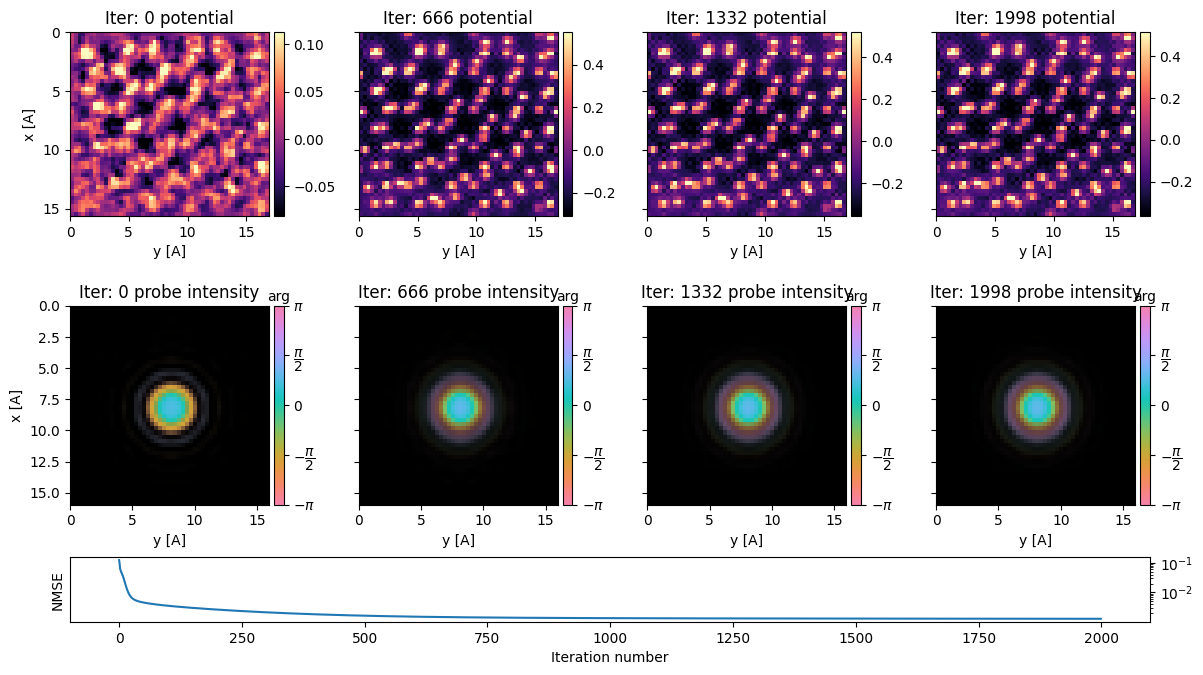

In [41]:
ms_ptycho = ms_ptycho.reconstruct(
    reconstruction_method = 'GD',
    num_iter = 2000,
    step_size=0.125,
    # gaussian_filter_sigma = 0.15,
    gaussian_filter = False, # set to False
    object_positivity = True,
    reset = True,
    # object_type = 'complex',
    object_type = 'potential',
    store_iterations = True,
).visualize(
    iterations_grid = 'auto',
)

In [42]:
ms_ptycho.error

0.001292864639193382

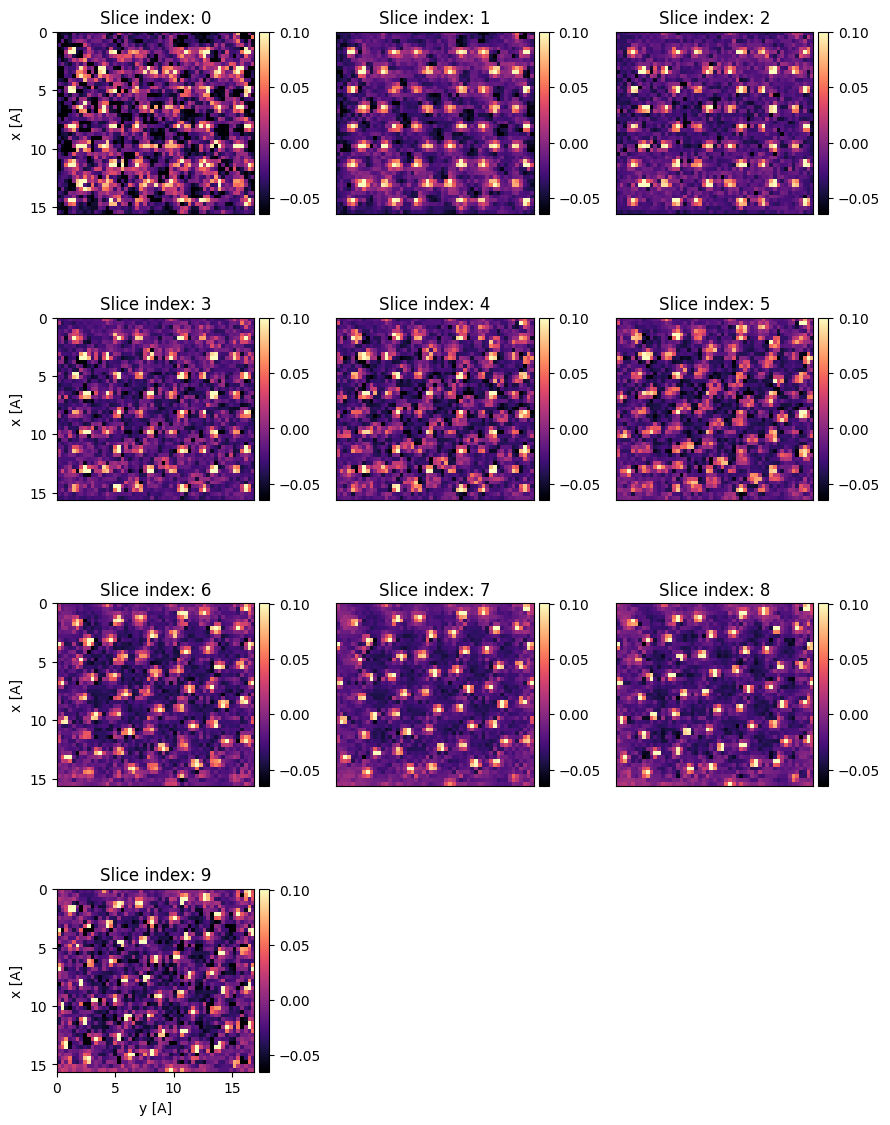

In [43]:
ms_ptycho.show_slices()

In [ ]:
ms_ptycho = ms_ptycho.reconstruct(
    reconstruction_method = 'GD',
    num_iter = 8000,
    step_size=0.125,
    # gaussian_filter_sigma = 0.15,
    gaussian_filter = False, # set to False
    object_positivity = True,
    reset = True,
    # object_type = 'complex',
    object_type = 'potential',
    store_iterations = True,
).visualize(
    iterations_grid = 'auto',
)

Performing 8000 iterations using a potential object type, with the GD algorithm, with normalization_min: 1 and step _size: 0.125.
Reconstructing object and probe:  14%|█▍        | 1122/8000 [1:37:46<9:57:19,  5.21s/ iter] 